## **Exploratory Data Analysis**

Para la presente actividad realizamos un análisis exploratorio del DataSet 🧓Activity Recognition in Senior Citizens; el cual está disponible en kaggle. El objetivo del presente análisis es darnos una primer idea de cómo se pueden interpretar los datos.

Como contexto general sabemos que El conjunto de datos de Reconocimiento de Actividad Humana contiene registros de 18 sujetos adultos mayores en estado físico variable (de 70 a 95 años de edad), *llevando puestos dos acelerómetros tridireccionales durante aproximadamente 40 minutos* en un protocolo semiestructurado de vida libre. **Los sensores estaban ubicados en el muslo derecho y la parte baja de la espalda.**

Las actividades que los adulos realizan están definidas por números los cuáles son:

```
  1: walking
  3: shuffling
  4: stairs (ascending)
  5: stairs (descending)
  6: standing
  7: sitting
  8: lying
```




---


Bibliografía:

TANWAR, A. (2023). Activity Recognition in Senior Citizens. Kaggle. Recuperado de:
>  https://www.kaggle.com/datasets/anshtanwar/adult-subjects-70-95-years-activity-recognition




In [59]:
# Llamado a librarías
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

### Validación de valores nulos, tamaño del Data Frame y unicidad de categorías

In [26]:
# Lectura y creación del Data Frame
df = pd.read_csv('/content/sample_data/501.csv', encoding='iso-8859-1')
df.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2021-03-24 14:42:03.839,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
1,2021-03-24 14:42:03.859,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
2,2021-03-24 14:42:03.880,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
3,2021-03-24 14:42:03.900,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
4,2021-03-24 14:42:03.920,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6


In [27]:
# Validamos si no hay valores nulos el Data Frame
df.isnull().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

In [28]:
# Obtenemos el tamaño de la base de datos
df.shape

(103860, 8)

In [29]:
# Validamos que las actividades únicas coincidad con la documentación
df['label'].unique()

array([6, 3, 1, 7, 8, 5, 4])

### Graficación de Valores

El objetivo de realizar este proceso es netamente ver de manera más gráfica como se comportan los datos a través del tiempo en el que se recolectaron. Aquí se muestran los cambios de aceleración en cada uno de los ejes (x,y,z) que arrojaron los acelerómetos.

#### Gráficas - Espalda baja

<Axes: xlabel='index'>

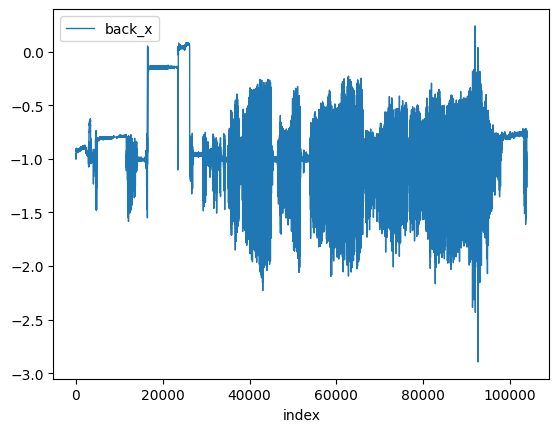

In [31]:
df.reset_index().plot(x = 'index', y = 'back_x', linewidth=1)

<Axes: xlabel='index'>

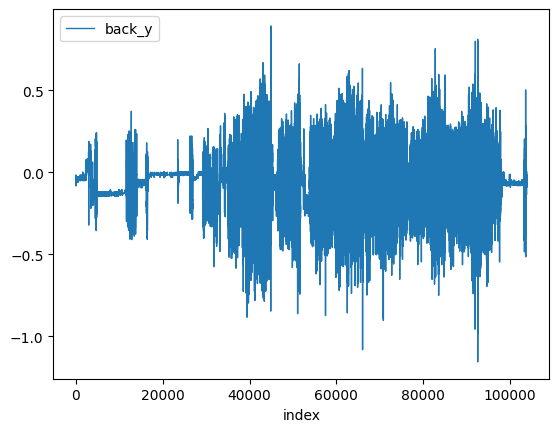

In [32]:
df.reset_index().plot(x = 'index', y = 'back_y', linewidth=1)

<Axes: xlabel='index'>

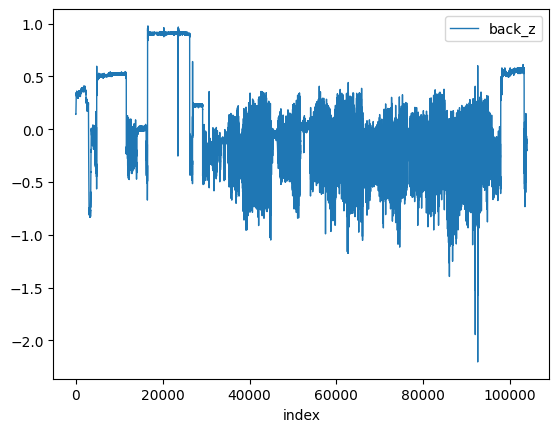

In [33]:
df.reset_index().plot(x = 'index', y = 'back_z',linewidth=1)

#### Gráficas - Muslo derecho

<Axes: xlabel='index'>

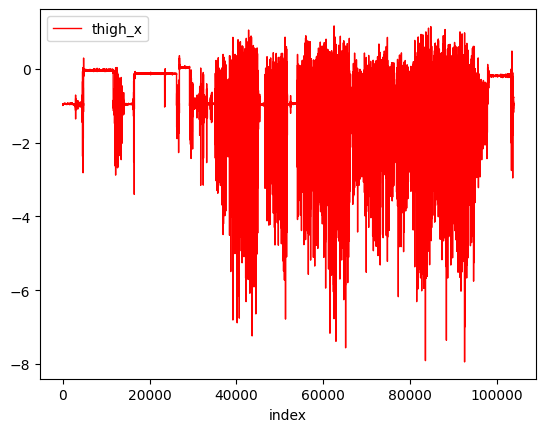

In [34]:
df.reset_index().plot(x = 'index', y = 'thigh_x', linewidth=1, color='red',)

<Axes: xlabel='index'>

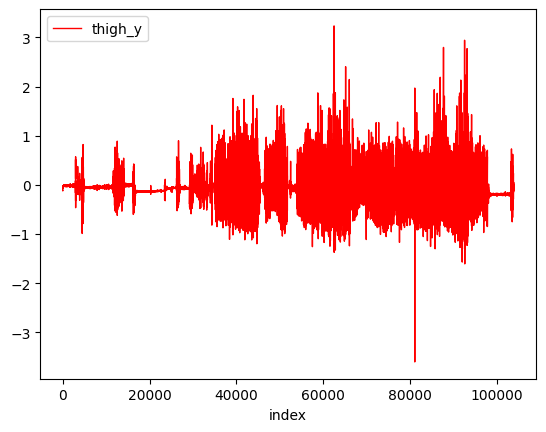

In [35]:
df.reset_index().plot(x = 'index', y = 'thigh_y', linewidth=1,color='red')

<Axes: xlabel='index'>

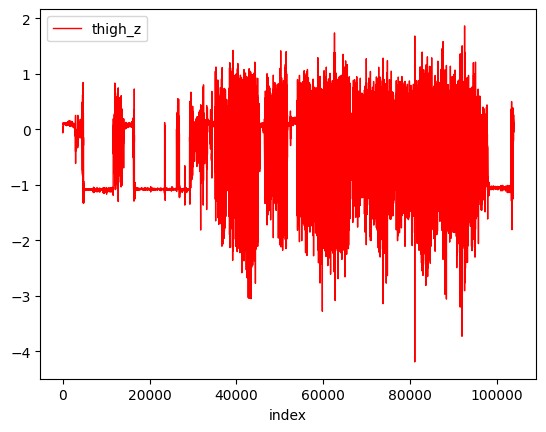

In [36]:
df.reset_index().plot(x = 'index', y = 'thigh_z', linewidth=1, color='red')

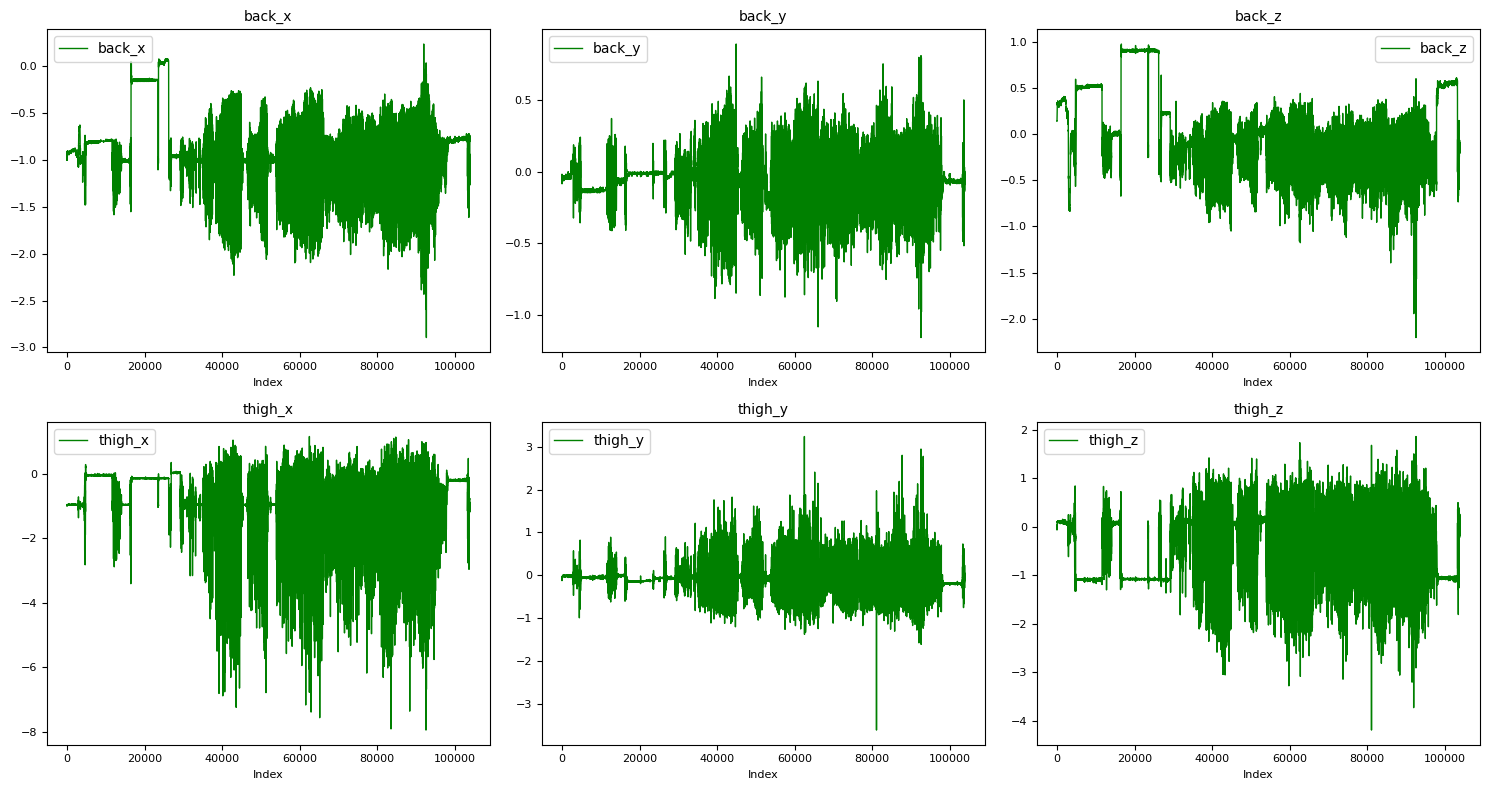

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

columns_to_plot = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']

for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3

    ax = axes[row, col]
    df.reset_index().plot(x='index', y=column, linewidth=1, color='green', ax=ax)

    ax.set_title(column, fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.set_xlabel('Index', fontsize=8)

plt.tight_layout()
plt.show()

### Estrategia de análisis

Una de las características primordieles del conjunto de datos es que las actividades están marcadas de manera continua, es decir; los labels que nos indican que está realizando el adulto mayor son continuos hasta que esta cambia, por ello nos dimos a la tarea de idenfificar esas fronteras entre los cambios de actividad.




In [38]:
# Assuming you have a DataFrame named 'df'
# For example:
# df = pd.DataFrame({'label': [8, 8, 8, 6, 6, 4, 4, 5, 5, 5]})

# Initialize variables to keep track of label changes and the previous label
label_change_indices = []
previous_label = None

# Iterate through the rows of the DataFrame
for index, row in df.iterrows():
    label = row['label']

    if previous_label is None:
        previous_label = label
    elif label != previous_label:
        label_change_indices.append(index)
        previous_label = label

# Now 'label_change_indices' contains the indices where the 'label' value changes


In [39]:
label_change_indices

[2912,
 2990,
 3378,
 3504,
 3838,
 3858,
 3882,
 3898,
 4438,
 4776,
 11606,
 11708,
 11844,
 13104,
 13250,
 13816,
 13946,
 14052,
 16186,
 16496,
 23448,
 23474,
 23516,
 23544,
 23580,
 26206,
 26484,
 26576,
 26866,
 29194,
 29998,
 30338,
 30500,
 30818,
 30994,
 31258,
 31274,
 31314,
 31334,
 31372,
 31672,
 31698,
 31878,
 31944,
 32034,
 32206,
 32454,
 32718,
 33048,
 33266,
 33356,
 33994,
 34322,
 34416,
 34534,
 34556,
 34986,
 37816,
 37924,
 44938,
 44960,
 44976,
 45116,
 45260,
 45370,
 46454,
 51700,
 51714,
 51764,
 52402,
 52532,
 53840,
 53866,
 53944,
 59110,
 59240,
 66264,
 66590,
 76284,
 76316,
 76370,
 76760,
 81118,
 81136,
 85194,
 85356,
 91262,
 91280,
 96178,
 96374,
 96644,
 96720,
 97278,
 97310,
 97438,
 97506,
 97762,
 97844,
 103248,
 103420,
 103512,
 103570,
 103656,
 103732]

In [40]:
# Con estas fronteras ubicadas nos es más fácil definir intervalos de análisis.
xset =  3504
split_df = df.iloc[0:xset]

#### Graficando muestras

##### Gráficas de espalada baja al xset = 3838

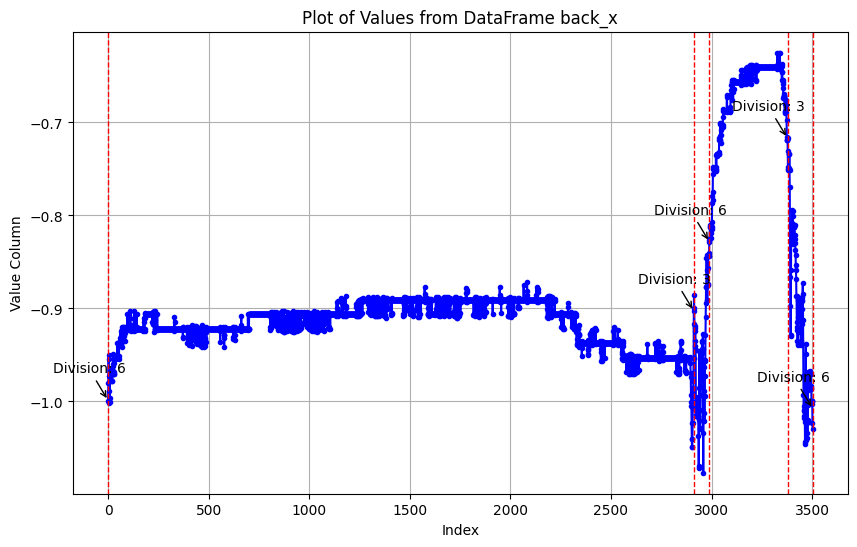

In [42]:
plot_value = 'back_x'

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(split_df.index, split_df[plot_value], marker='.', linestyle='-', color='blue', label='Data Points')

plt.axvline(x=0, color='red', linestyle='--', label='Division Line', linewidth=1)
division_value = df.loc[0, 'label']
plt.annotate(f'Division: {division_value}', xy=(0, df.loc[0, plot_value]),
                xytext=(-40, 20), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black'))

for data in label_change_indices:
    if data > xset:
        break
    plt.axvline(x=data, color='red', linestyle='--', label='Division Line', linewidth=1)
    division_value = df.loc[data, 'label']
    plt.annotate(f'Division: {division_value}', xy=(data, df.loc[data, plot_value]),
                 xytext=(-40, 20), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='black'))
plt.title('Plot of Values from DataFrame back_x')
plt.xlabel('Index')
plt.ylabel('Value Column')
plt.grid(True)
plt.show()

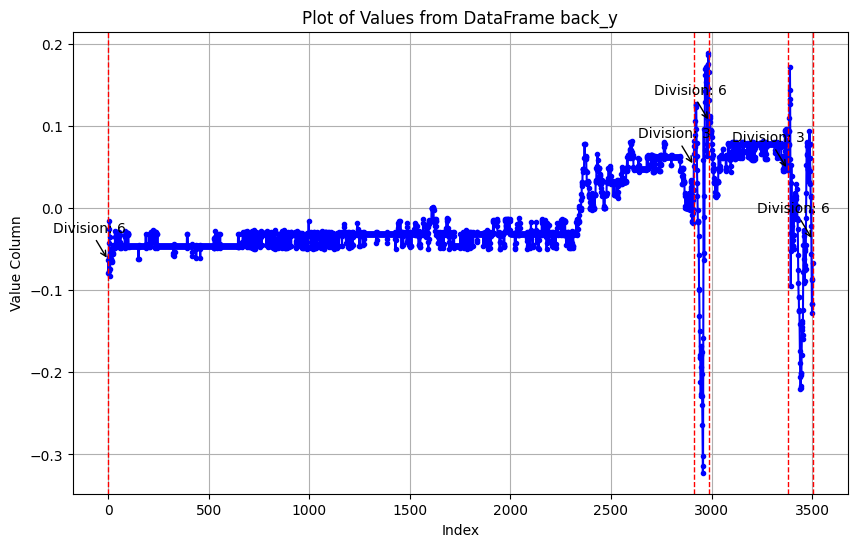

In [43]:
plot_value = 'back_y'

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(split_df.index, split_df[plot_value], marker='.', linestyle='-', color='blue', label='Data Points')

plt.axvline(x=0, color='red', linestyle='--', label='Division Line', linewidth=1)
division_value = df.loc[0, 'label']
plt.annotate(f'Division: {division_value}', xy=(0, df.loc[0, plot_value]),
                xytext=(-40, 20), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black'))

for data in label_change_indices:
    if data > xset:
        break
    plt.axvline(x=data, color='red', linestyle='--', label='Division Line', linewidth=1)
    division_value = df.loc[data, 'label']
    plt.annotate(f'Division: {division_value}', xy=(data, df.loc[data, plot_value]),
                 xytext=(-40, 20), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='black'))
plt.title('Plot of Values from DataFrame back_y')
plt.xlabel('Index')
plt.ylabel('Value Column')
plt.grid(True)
plt.show()

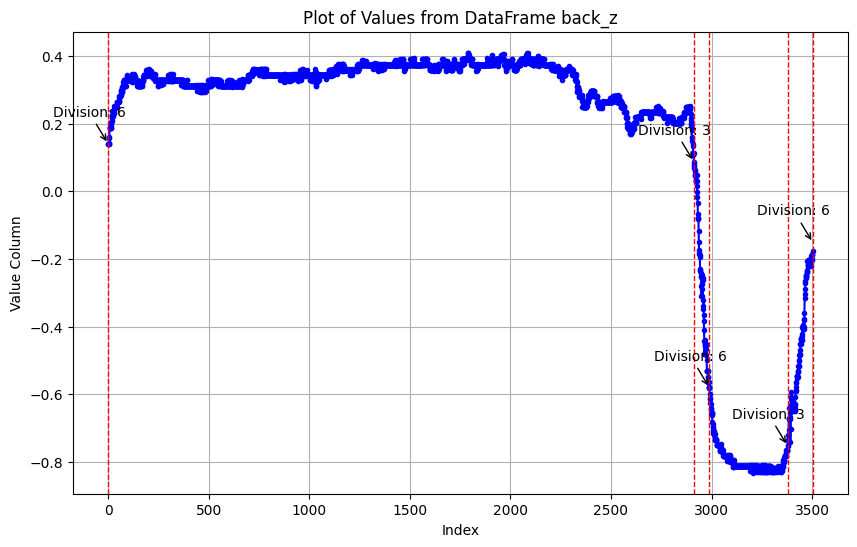

In [44]:
plot_value = 'back_z'

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(split_df.index, split_df[plot_value], marker='.', linestyle='-', color='blue', label='Data Points')

plt.axvline(x=0, color='red', linestyle='--', label='Division Line', linewidth=1)
division_value = df.loc[0, 'label']
plt.annotate(f'Division: {division_value}', xy=(0, df.loc[0, plot_value]),
                xytext=(-40, 20), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black'))

for data in label_change_indices:
    if data > xset:
        break
    plt.axvline(x=data, color='red', linestyle='--', label='Division Line', linewidth=1)
    division_value = df.loc[data, 'label']
    plt.annotate(f'Division: {division_value}', xy=(data, df.loc[data, plot_value]),
                 xytext=(-40, 20), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='black'))
plt.title('Plot of Values from DataFrame back_z')
plt.xlabel('Index')
plt.ylabel('Value Column')
plt.grid(True)
plt.show()

##### Gráficas de muslo derecho al xset = 3838

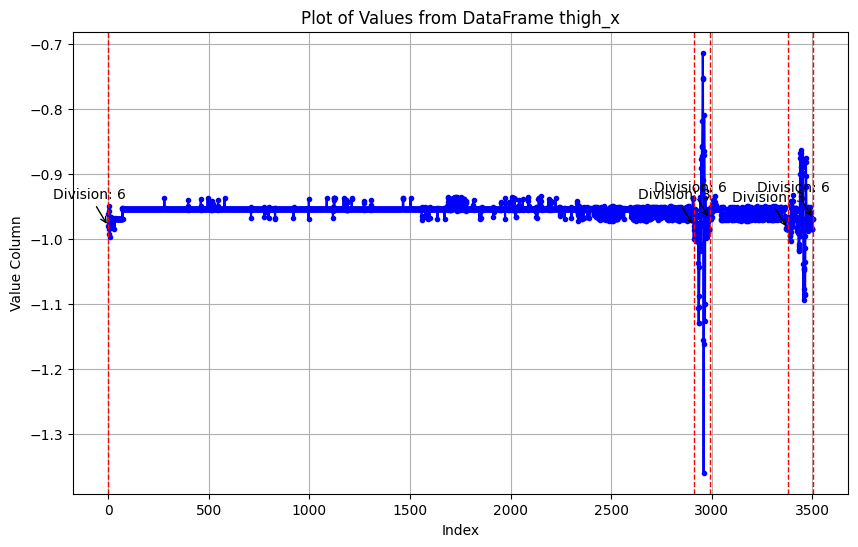

In [45]:
plot_value = 'thigh_x'

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(split_df.index, split_df[plot_value], marker='.', linestyle='-', color='blue', label='Data Points')

plt.axvline(x=0, color='red', linestyle='--', label='Division Line', linewidth=1)
division_value = df.loc[0, 'label']
plt.annotate(f'Division: {division_value}', xy=(0, df.loc[0, plot_value]),
                xytext=(-40, 20), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black'))

for data in label_change_indices:
    if data > xset:
        break
    plt.axvline(x=data, color='red', linestyle='--', label='Division Line', linewidth=1)
    division_value = df.loc[data, 'label']
    plt.annotate(f'Division: {division_value}', xy=(data, df.loc[data, plot_value]),
                 xytext=(-40, 20), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='black'))
plt.title('Plot of Values from DataFrame thigh_x')
plt.xlabel('Index')
plt.ylabel('Value Column')
plt.grid(True)
plt.show()

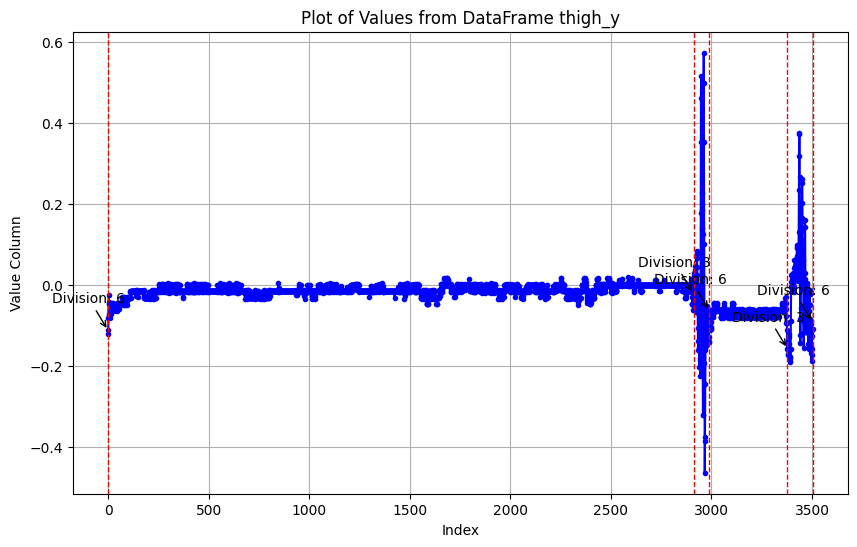

In [46]:
plot_value = 'thigh_y'

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(split_df.index, split_df[plot_value], marker='.', linestyle='-', color='blue', label='Data Points')

plt.axvline(x=0, color='red', linestyle='--', label='Division Line', linewidth=1)
division_value = df.loc[0, 'label']
plt.annotate(f'Division: {division_value}', xy=(0, df.loc[0, plot_value]),
                xytext=(-40, 20), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black'))

for data in label_change_indices:
    if data > xset:
        break
    plt.axvline(x=data, color='red', linestyle='--', label='Division Line', linewidth=1)
    division_value = df.loc[data, 'label']
    plt.annotate(f'Division: {division_value}', xy=(data, df.loc[data, plot_value]),
                 xytext=(-40, 20), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='black'))
plt.title('Plot of Values from DataFrame thigh_y')
plt.xlabel('Index')
plt.ylabel('Value Column')
plt.grid(True)
plt.show()

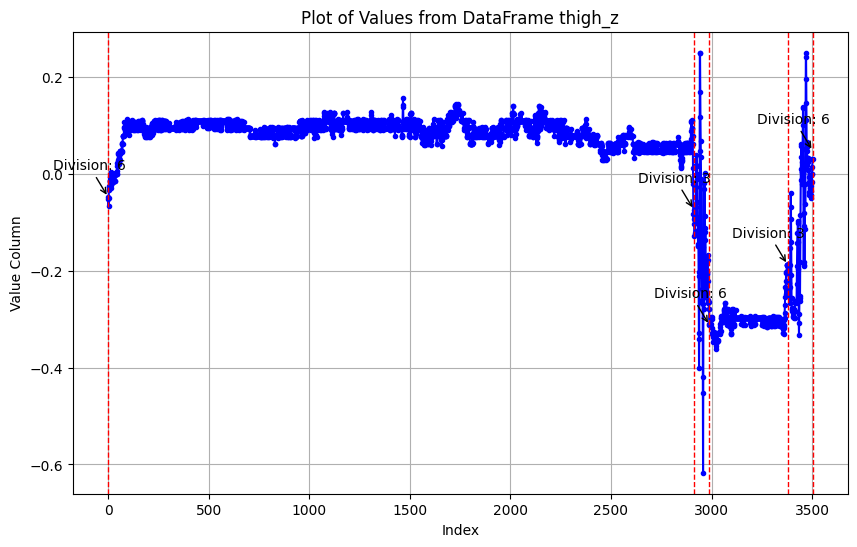

In [47]:
plot_value = 'thigh_z'

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(split_df.index, split_df[plot_value], marker='.', linestyle='-', color='blue', label='Data Points')

plt.axvline(x=0, color='red', linestyle='--', label='Division Line', linewidth=1)
division_value = df.loc[0, 'label']
plt.annotate(f'Division: {division_value}', xy=(0, df.loc[0, plot_value]),
                xytext=(-40, 20), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='black'))

for data in label_change_indices:
    if data > xset:
        break
    plt.axvline(x=data, color='red', linestyle='--', label='Division Line', linewidth=1)
    division_value = df.loc[data, 'label']
    plt.annotate(f'Division: {division_value}', xy=(data, df.loc[data, plot_value]),
                 xytext=(-40, 20), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='black'))
plt.title('Plot of Values from DataFrame thigh_z')
plt.xlabel('Index')
plt.ylabel('Value Column')
plt.grid(True)
plt.show()

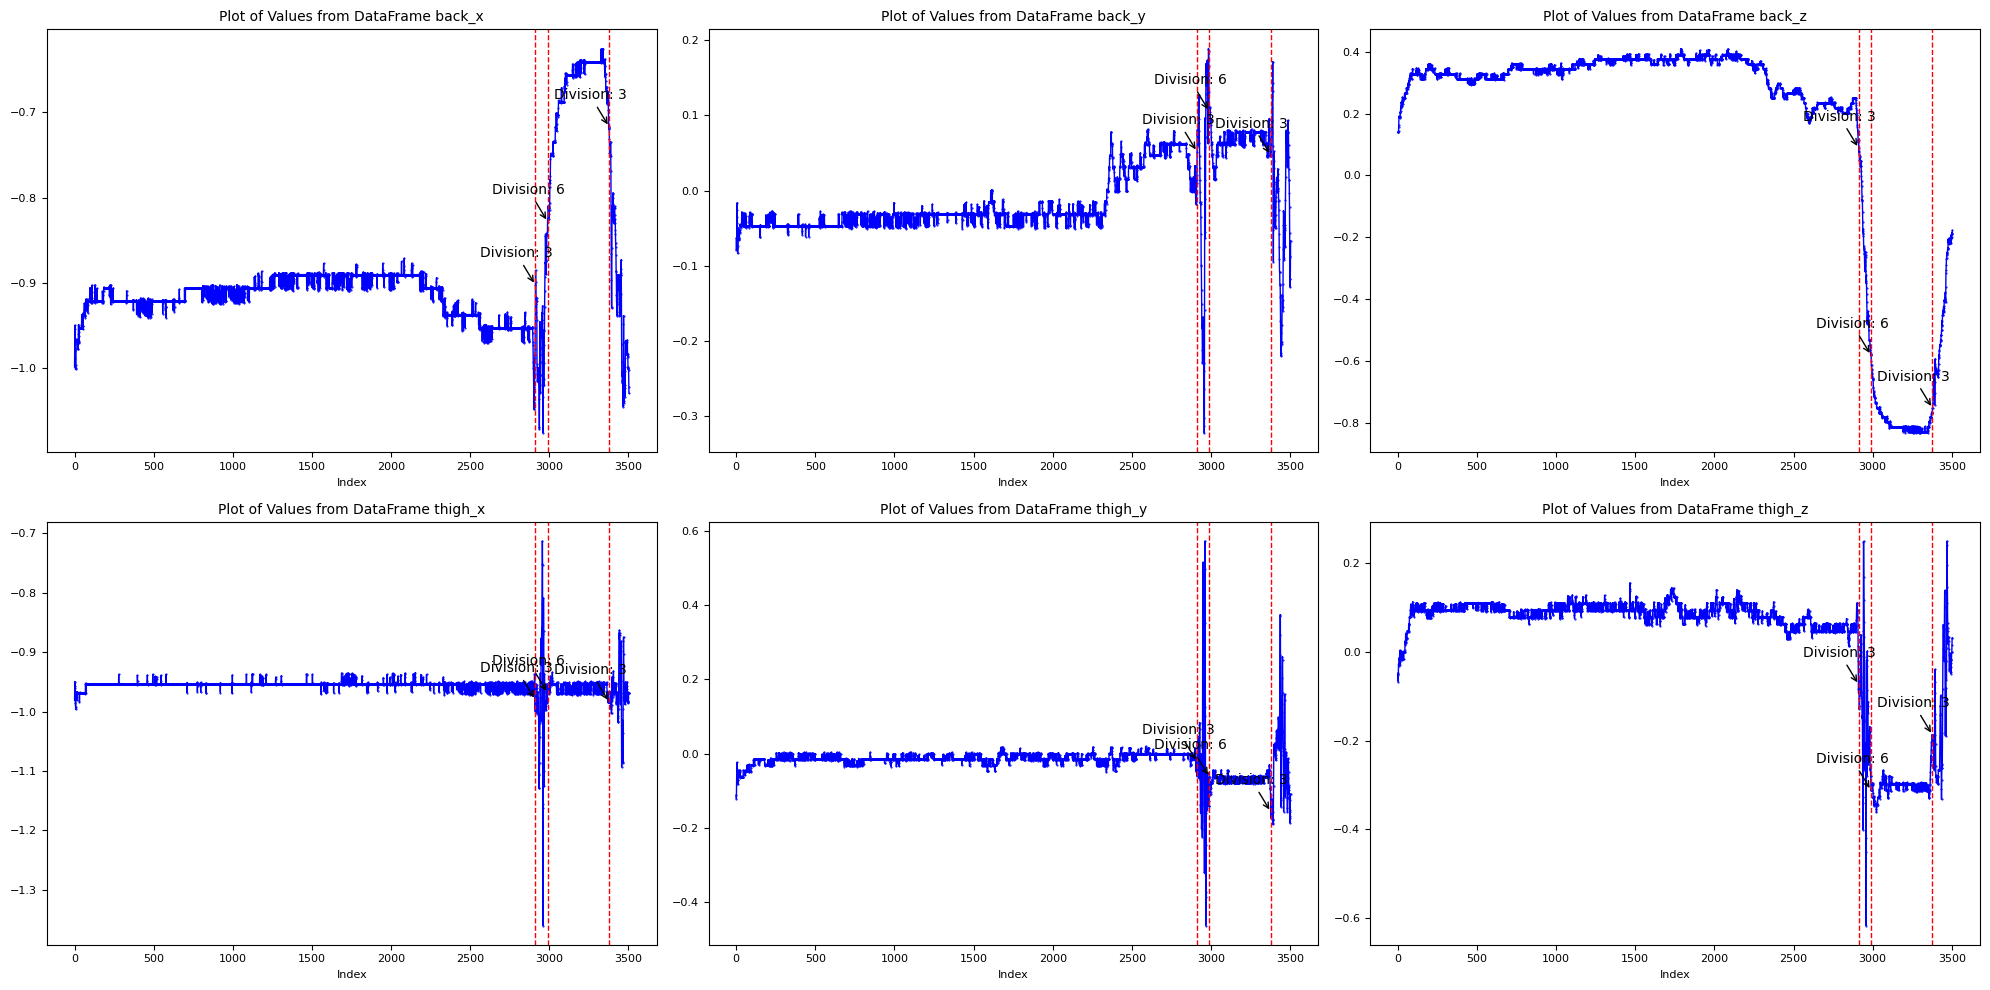

In [57]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

columns_to_plot = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']

for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3

    ax = axes[row, col]
    ax.plot(split_df.index, split_df[column], marker='.', linestyle='-', color='blue', label='Data Points', linewidth=1, markersize=1)

    for data in label_change_indices:
        if data >= len(split_df.index):  # Evita índices fuera de rango
            break
        ax.axvline(x=data, color='red', linestyle='--', label='Division Line', linewidth=1)
        division_value = df.loc[data, 'label']
        ax.annotate(f'Division: {division_value}', xy=(data, split_df.loc[data, column]),
                    xytext=(-40, 20), textcoords='offset points',
                    arrowprops=dict(arrowstyle='->', color='black'))

    ax.set_title(f'Plot of Values from DataFrame {column}', fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.set_xlabel('Index', fontsize=8)

plt.tight_layout()
plt.show()


<ipython-input-62-5d7c12f92627>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


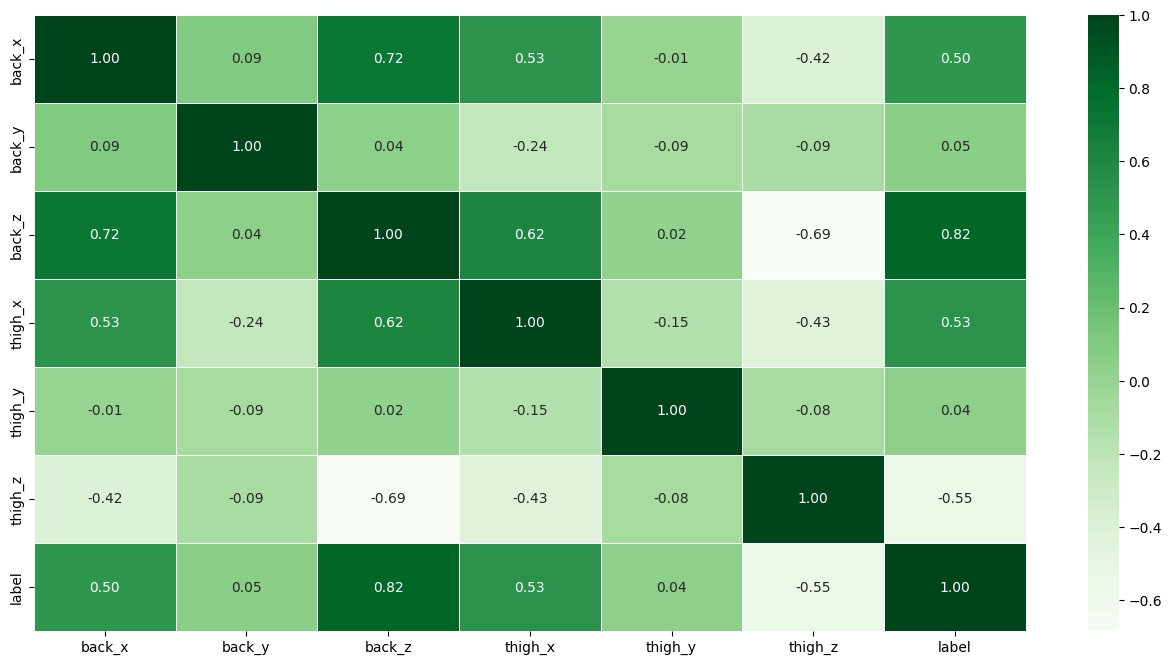

In [62]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4, annot_kws={"size": 10}, cmap='Greens', ax=ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()